In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#read the csv to pandas
snow = pd.read_csv("../data/alta_cum_month.csv", names = ['YEAR','DEC','JAN','FEB','MAR','APR','MAY'])
snow

,YEAR,DEC,JAN,FEB,MAR,APR,MAY
0,1946,276.86,487.68,702.31,829.31,1004.60,1145.50
1,1947,175.26,335.28,490.22,624.84,797.56,949.96
2,1948,299.72,502.92,619.76,787.40,1206.50,1394.50
3,1949,180.34,586.74,922.02,1069.30,1315.70,1328.40
4,1950,99.06,447.04,784.86,871.22,1148.10,1211.60
...,...,...,...,...,...,...,...
69,2015,151.13,337.82,410.21,499.11,560.07,679.45
70,2016,116.84,383.54,629.92,716.28,891.54,998.22
71,2017,166.88,367.54,758.70,1047.80,1162.00,1347.50
72,2018,38.10,147.32,278.13,445.77,624.84,731.52


171.61148648648648 1240.0021621621622
94.50096810146806 267.69980904025675
-0.5795865120416223 -0.1393432527871272


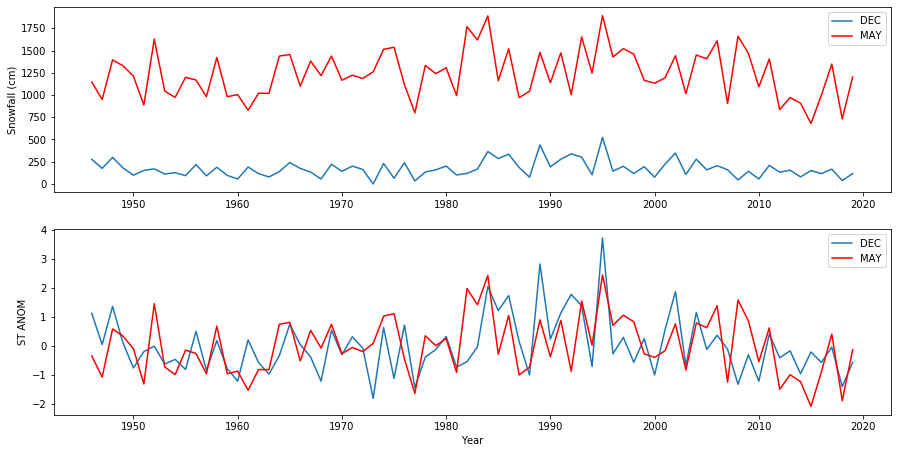

In [13]:

#plot totals
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.plot(snow['YEAR'],snow['DEC'],label='DEC')
ax1.plot(snow['YEAR'],snow['MAY'],color='red',label='MAY')
ax1.set_ylabel('Snowfall (cm)')
ax1.legend()

x = snow['DEC']
y = snow['MAY']

#get means
xm = np.mean(x)
ym = np.mean(y)


#get st devs
xs = np.std(x)
ys = np.std(y)


#get anomalies
xprime = x - xm
yprime = y - ym

#standardize anomalies
xstar = xprime/xs
ystar = yprime/ys


#plot anomalies
ax2.plot(snow['YEAR'],xstar,label='DEC')
ax2.plot(snow['YEAR'],ystar,label='MAY',color='red')
ax2.legend()
ax2.set_ylabel('ST ANOM')
ax2.set_xlabel('Year')

plt.show()

8930.432972114688 71663.18776018993 11802.12854408327
8930.432972114682 71663.1877601899 11802.128544083273
1.3215628604946104 1.3215628604946112 0.4665261815891144 0.46652618158911474 0.21764667810811936 0.7823533218918807
1181.0452784701645


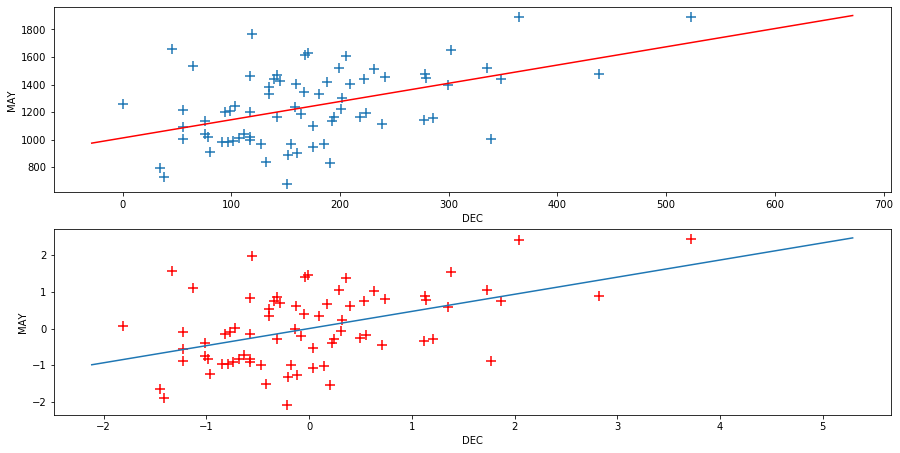

In [14]:
#Brute force regression
covar_1 = 0
varx_1 = 0
vary_1 = 0
n = len(snow)
for i in range(0,n):
    covar_1 = covar_1 + xprime[i]*yprime[i]
    varx_1 = varx_1 + xprime[i]*xprime[i]
    vary_1 = vary_1 + yprime[i]*yprime[i]

covar_1 = covar_1/n
varx_1 = varx_1/n
vary_1 = vary_1/n


b_1 = covar_1/varx_1
r_1 = covar_1/np.sqrt(varx_1*vary_1)
sdx_1 = np.sqrt(varx_1)
sdy_1 = np.sqrt(vary_1)

#using linear algebra
covar_2 = np.dot(xprime,yprime)
varx_2 = np.dot(xprime,xprime)
vary_2 = np.dot(yprime,yprime)
covar_2 = covar_2/n
varx_2 = varx_2/n
vary_2 = vary_2/n


b_2 = covar_2/varx_2
r_2 = covar_2/np.sqrt(varx_2*vary_2)
sdx_2 = np.sqrt(varx_2)
sdy_2 = np.sqrt(vary_2)

# add code and comments here to compute explained and unexplained variance


#add code and comments here to compute the may1_2019 snow total from the
# assumed dec 1 2019 of 127 cm




#compute estimate of y over range of x's
xhat = np.linspace(-200,500,100)
yhat = b_2*xhat

XH = xm+xhat
YH = ym+yhat

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.scatter(x,y,marker='+',s=100)
ax1.plot(XH,YH,color='red')
ax1.set_xlabel('DEC')
ax1.set_ylabel('MAY')
ax2.scatter(xstar,ystar,marker='+',color='red',s=100)
ax2.plot(xhat/xs,yhat/ys)
ax2.set_xlabel('DEC')
ax2.set_ylabel('MAY')
plt.show()

         DEC       JAN       FEB       MAR       APR       MAY
0   1.113729  0.534141  0.317552 -0.083282 -0.278236 -0.353015
1   0.038608 -0.407802 -0.720357 -0.999083 -1.143170 -1.083460
2   1.355632  0.628335 -0.086424 -0.270993  0.565224  0.577131
3   0.092364  1.146403  1.392751  0.991609  1.021419  0.330213
4  -0.767733  0.282956  0.721529  0.104429  0.321251 -0.106097
..       ...       ...       ...       ...       ...       ...
69 -0.216733 -0.392103 -1.111903 -1.562215 -2.135311 -2.093958
70 -0.579587 -0.109520 -0.036704 -0.589532 -0.750558 -0.903184
71 -0.050068 -0.208412  0.593509  0.895313  0.379320  0.401561
72 -1.412805 -1.569531 -1.758265 -1.801119 -1.864727 -1.899449
73 -0.579587 -0.863074 -0.782507 -0.270993 -0.124500 -0.139343

[74 rows x 6 columns]


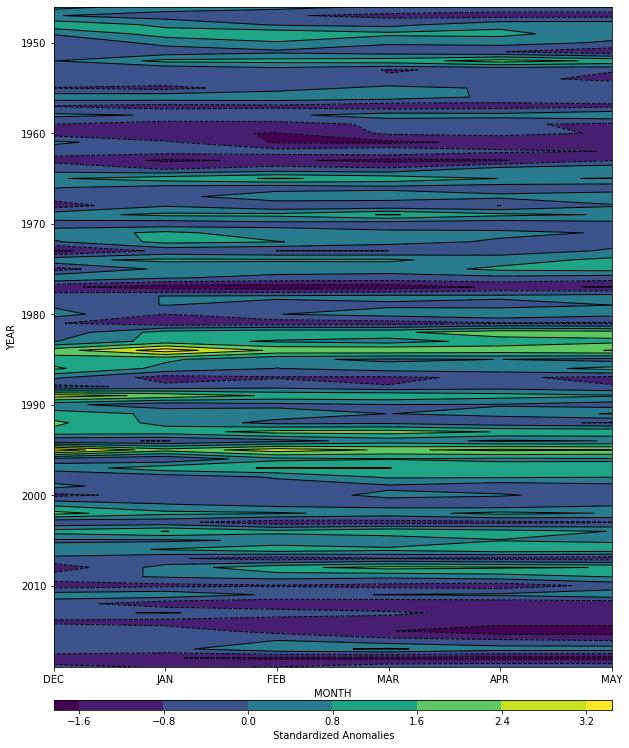

In [15]:
#Figure 6 - hovmuller diagram of standardized temporal anomalies

xt = snow.drop('YEAR',axis=1)
xtm = xt.mean(axis=0)
xts = np.std(xt)


no=6

#anomalies
xtp = pd.DataFrame()
for col in list(xt.columns):
    xtp[col] = xt[col].apply(lambda x : x - xtm[col])

#standardized anomalies
xstar  = pd.DataFrame()
for col in list(xtp.columns):
    xstar[col] = xtp[col].apply(lambda x : x/xts[col])
fig,ax = plt.subplots(figsize=(10,15))
ax.invert_yaxis()
cf = ax.contourf(np.arange(1,no+1,1),snow['YEAR'],xstar,extend='both')
cs = ax.contour(np.arange(1,no+1,1),snow['YEAR'],xstar,colors='k', linewidths=1)
ax.set_xticklabels(xstar.columns.values)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
ax.set_xlabel('MONTH')
ax.set_ylabel('YEAR')

cbar.set_label(' Standardized Anomalies')
plt.show()

          DEC       JAN       FEB       MAR       APR       MAY
DEC  1.000000  0.724331  0.598310  0.537196  0.494088  0.466526
JAN  0.724331  1.000000  0.868178  0.796683  0.751775  0.729939
FEB  0.598310  0.868178  1.000000  0.941277  0.893826  0.851526
MAR  0.537196  0.796683  0.941277  1.000000  0.927093  0.879555
APR  0.494088  0.751775  0.893826  0.927093  1.000000  0.946500
MAY  0.466526  0.729939  0.851526  0.879555  0.946500  1.000000


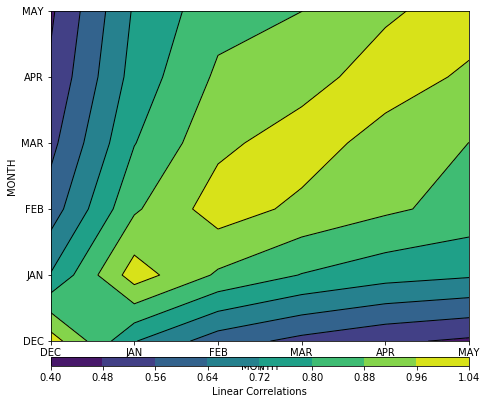

In [16]:
#compute correlation between each time series
cors=xstar.corr()
print(cors)

fig,ax = plt.subplots(figsize=(7.5,7.5))
cf = ax.contourf(cors)
cs = ax.contour(cors,colors='k', linewidths=1)
ax.set_xticklabels(xstar.columns.values)
ax.set_yticklabels(xstar.columns.values)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)

ax.set_xlabel('MONTH')
ax.set_ylabel('MONTH')

cbar.set_label('Linear Correlations')
plt.show()

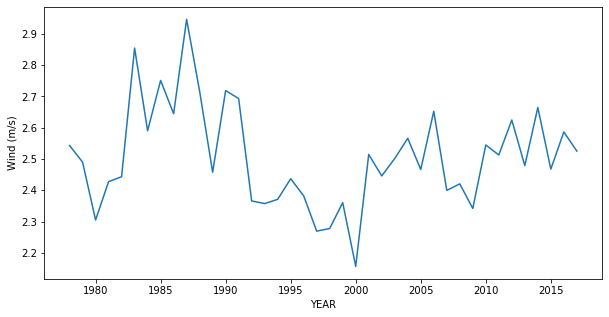

In [17]:
#read the SLC annual wind speeds csv to pandas
wind = pd.read_csv("../data/slc_winds.csv", names = ['YEAR','SLC'])
#plot yearly mean wind
fig,ax3 = plt.subplots(figsize=(10,5))
ax3.plot(wind['YEAR'],wind['SLC'],label='SLC Wind')
ax3.set_ylabel('Wind (m/s)')
ax3.set_xlabel('YEAR')
plt.show()

-0.00636183135685484 -0.0006334817619047872 -0.33473202728630197 -0.022312594951843363 0.21764667810811936 0.7823533218918807 0.0004978518934850259 0.9995021481065149


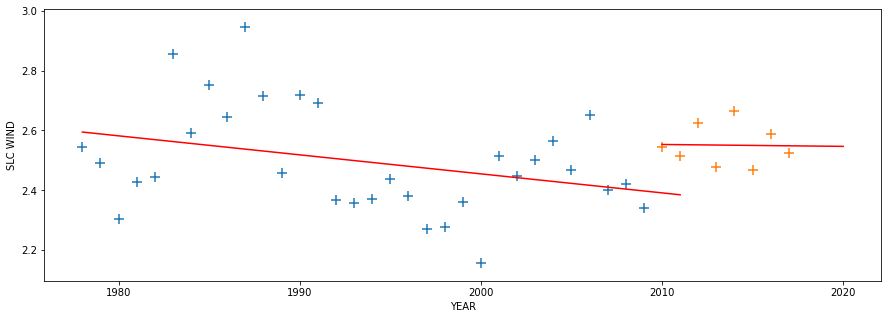

In [21]:
#Brute force regression for two fits splitting on year 2010 for SLC wind
w = wind['SLC']
yr = wind['YEAR']
xm1 = np.mean(yr[0:32])
ym1 = np.mean(w[0:32])
xp1 = yr[0:32] - xm1
yp1 = w[0:32] - ym1
cov1 = np.dot(yp1,xp1)
vx1 = np.dot(xp1,xp1)
vy1 = np.dot(yp1,yp1)
b1 = cov1/vx1
r1 = cov1/np.sqrt(vx1*vy1)
ev1 = r_1*r_1
uev1 = 1 - ev1
#compute estimate of y over range of x's
X1 = np.linspace(1978,2011,50)
Y1 = ym1+ b1*(X1-xm1)

xm2 = np.mean(yr[32:40])
ym2 = np.mean(w[32:40])
xp2 = yr[32:40] - xm2
yp2 = w[32:40] - ym2
cov2 = np.dot(yp2,xp2)
vx2 = np.dot(xp2,xp2)
vy2 = np.dot(yp2,yp2)
b2 = cov2/vx2
r2 = cov2/np.sqrt(vx2*vy2)
ev2 = r2*r2
uev2 = 1 - ev2


#compute estimate of y over range of x's
X2 = np.linspace(2010,2020,15)
Y2 = ym2 + b2*(X2-xm2)

fig,ax4 = plt.subplots(figsize=(15,5))
ax4.scatter(xp1+xm1,yp1+ym1,marker='+',s=100)
ax4.scatter(xp2+xm2,yp2+ym2,marker='+',s=100)
ax4.plot(X1,Y1,color='red')
ax4.plot(X2,Y2,color='red')
ax4.set_xlabel('YEAR')
ax4.set_ylabel('SLC WIND')
plt.show()